In [132]:
## Not sure if we need this
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Monthly inflation rate
- webscrapping data from https://www.usinflationcalculator.com/inflation/current-inflation-rates/

In [133]:
# webscrapping
from bs4 import BeautifulSoup
import requests

In [134]:
# get URL
response = requests.get(url="https://www.usinflationcalculator.com/inflation/current-inflation-rates/")

In [135]:
# if request is successful, will return 200
response.status_code

200

In [143]:
# html parser
soup = BeautifulSoup(response.text, 'html.parser')

# find the correct table
page = soup.find_all("table")[0].find_all("td")[14:]

# create a dictionary with keys = year, values = list of monthly inflation rate
inf_rate_by_year = {int(line.text): [float(page[15+14*ind+i].text) for i in range(12)]  for ind, line in enumerate(page[14::14])}
inf_rate_by_year[2024] = [line.text for line in page[1:5]]

# create a list of monthly inflation rate if year is not important
inf_list = []
for k in sorted(inf_rate_by_year.keys()):
    inf_list += inf_rate_by_year[k]

df = pd.DataFrame({'Date': pd.date_range(start=pd.to_datetime("1/2000"), end=pd.to_datetime("4/2024"),freq="MS"), 'Inflation Rate': inf_list})

# inflation rate by month data from 2000-2024 April = 24 years 4 months
assert len(inf_list) == 24*12 + 4

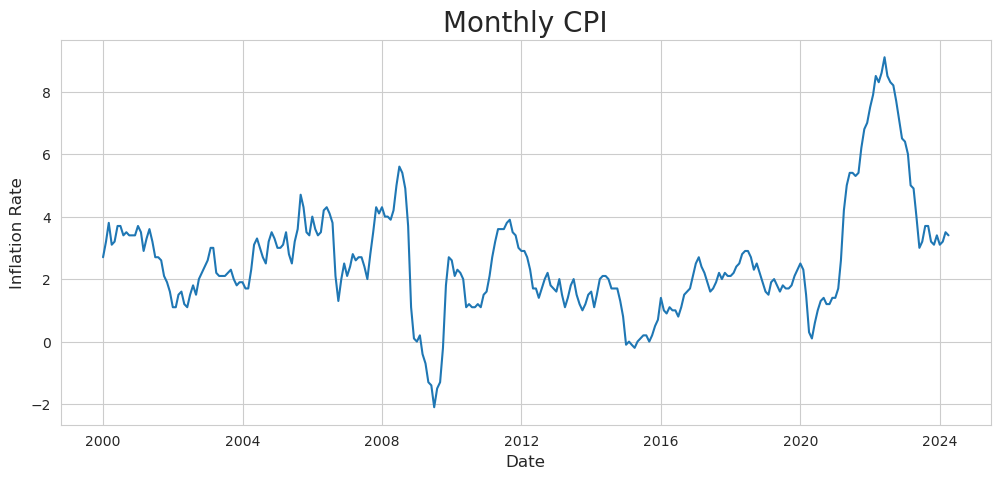

In [144]:
plt.figure(figsize=(12,5))

plt.plot(df["Date"],df["Inflation Rate"])

plt.title('Monthly CPI', fontsize=20)

plt.xlabel("Date", fontsize = 12)
plt.ylabel("Inflation Rate", fontsize=12)

plt.show()

In [146]:
# write to csv in filepath
df.to_csv("../main_data/features_data/cpi.csv")

## 2. Stocks data